# Linear Classification TensorFlow 2

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


## Load Data 

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
type (data)

sklearn.utils.Bunch

In [6]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.data.shape

(569, 30)

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
data.target.shape

(569,)

In [9]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape
print(N, D)

381 30


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Build Model

In [17]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(D,)),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Training

In [19]:
r = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100)

print(" Train Score:", model.evaluate(X_train,y_train))
print(" Test Score:", model.evaluate(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 0s 11ms/step - loss: 1.4857 - accuracy: 0.2546 - val_loss: 1.2740 - val_accuracy: 0.3511
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 1.3583 - accuracy: 0.2756 - val_loss: 1.1689 - val_accuracy: 0.3723
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 1.2372 - accuracy: 0.3097 - val_loss: 1.0711 - val_accuracy: 0.3936
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 1.1229 - accuracy: 0.3386 - val_loss: 0.9823 - val_accuracy: 0.4309
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 1.0199 - accuracy: 0.4042 - val_loss: 0.9005 - val_accuracy: 0.4628
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.9265 - accuracy: 0.4541 - val_loss: 0.8263 - val_accuracy: 0.5053
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.8419 - accuracy: 0.4882 - val_loss: 0.7606 - val_accuracy: 0.5479
Epoch 8/100


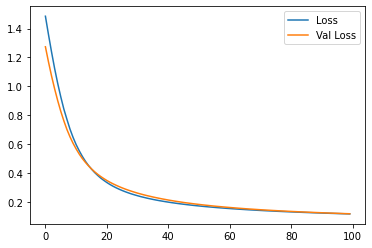

In [22]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label= "Loss")
plt.plot(r.history['val_loss'], label = "Val Loss")
plt.legend();

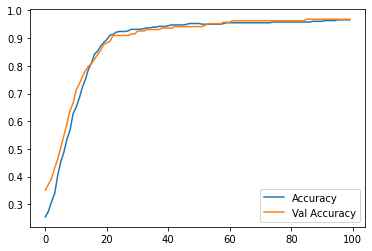

In [23]:
# plot accuracy
plt.plot(r.history['accuracy'], label= "Accuracy")
plt.plot(r.history['val_accuracy'], label = "Val Accuracy")
plt.legend();

## Making Predictions

In [24]:
P = model.predict(X_test)
print(P)

[[9.79056478e-01]
 [9.99199152e-01]
 [8.96261573e-01]
 [2.66879678e-01]
 [9.42741692e-01]
 [9.87148404e-01]
 [3.99229556e-01]
 [1.05682641e-01]
 [9.63884711e-01]
 [9.96446848e-01]
 [9.89598751e-01]
 [2.96372175e-03]
 [5.58296144e-02]
 [2.45635301e-01]
 [9.82181907e-01]
 [9.71768022e-01]
 [9.44216251e-01]
 [9.92138147e-01]
 [1.79025710e-01]
 [6.59598053e-01]
 [9.98371959e-01]
 [3.99911404e-03]
 [9.32819366e-01]
 [4.54708934e-03]
 [9.79408324e-01]
 [9.87091899e-01]
 [1.38162076e-02]
 [2.23044753e-02]
 [9.46878791e-01]
 [8.51240933e-01]
 [2.06387639e-02]
 [9.03507233e-01]
 [2.29127824e-01]
 [9.67085004e-01]
 [9.88125384e-01]
 [1.94564462e-03]
 [7.97015429e-03]
 [6.74039125e-02]
 [9.42008853e-01]
 [9.73936319e-01]
 [9.12243843e-01]
 [2.89901793e-02]
 [6.65836632e-02]
 [6.25080526e-01]
 [9.83843684e-01]
 [3.37235630e-02]
 [4.37931448e-01]
 [6.54930413e-01]
 [5.59562862e-01]
 [8.04969847e-01]
 [9.23717976e-01]
 [9.86967862e-01]
 [9.98208761e-01]
 [9.68037963e-01]
 [2.50048041e-02]
 [9.429321

In [25]:
P.shape

(188, 1)

In [26]:
# Round and flatten
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.]


## Saving Model

In [27]:
model.save('model_output/linearclass.h5')

In [28]:
model = tf.keras.models.load_model('model_output/linearclass.h5')

In [29]:
print(model.layers)

In [30]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 660us/step - loss: 0.1167 - accuracy: 0.9681


[0.11673503369092941, 0.9680851101875305]